![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

In [1]:
#Required Libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Importing Data
retail = pd.read_csv(r'C:\Users\risha\case_study\OnlineRetail.csv\OnlineRetail.csv',encoding= 'unicode_escape')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail.shape

(541909, 8)

In [5]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail.dropna(inplace=True)

C:\Users\risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='count'>

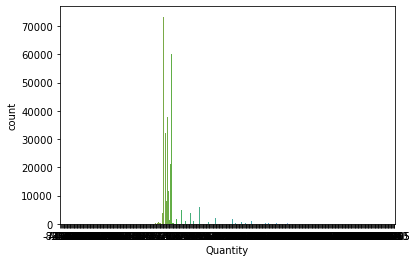

In [9]:
sns.countplot(retail['Quantity'])

C:\Users\risha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

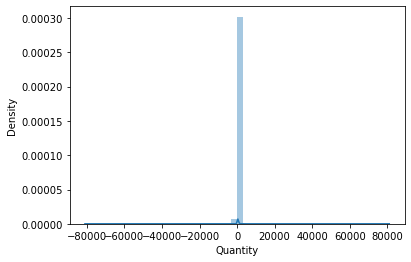

In [10]:
sns.distplot(retail['Quantity'])

In [11]:
retail['Description'] = retail['Description'].astype(str)

In [12]:
#Customer Segmentation

#Recency : Number of days since last purchase
#Frequency : Number of Transactions
#Monetary : Total amount of Transactions

In [13]:
#Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
#Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceDate'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
#Merging two dfs

rfm = pd.merge(rfm_m,rfm_f,on='CustomerID',how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

max_date=  max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [19]:
rfm = pd.merge(rfm,rfm_p,on='CustomerID')
rfm.columns=['CustomerID','Amount','Frequency','Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


<AxesSubplot:>

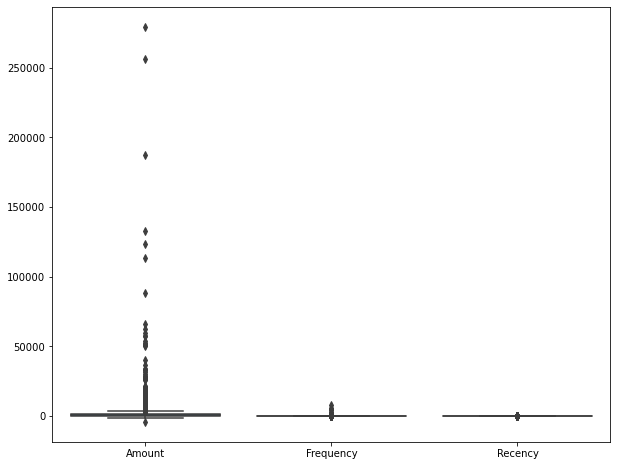

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(data=rfm[['Amount','Frequency','Recency']])

In [25]:
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount>= Q1 -1.5*IQR) & (rfm.Amount<= Q1 +1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency>= Q1 -1.5*IQR) & (rfm.Frequency<= Q1 +1.5*IQR)]

Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency>= Q1 -1.5*IQR) & (rfm.Recency<= Q1 +1.5*IQR)]


In [26]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [30]:
rfm_df = rfm[['Amount','Frequency','Recency']]
scaler = StandardScaler()
rfm_df_scaled =scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4166, 3)

In [31]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled,columns=['Amount','Frequency','Recency'])
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.837157,-0.868560,2.266859
1,2.465836,1.548115,-0.925189
2,0.540168,-0.479207,-0.205993
3,0.509752,0.084684,-0.757705
4,-0.580887,-0.667170,2.109227


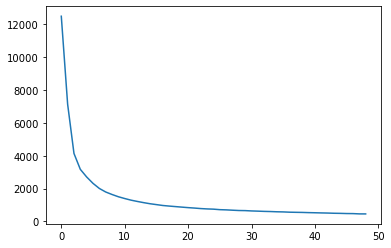

In [32]:
#elbow method

inertia=[]
for i in range(1,50):
    Kmeans = KMeans(n_clusters=i,max_iter=50)
    Kmeans.fit(rfm_df_scaled)
    inertia.append(Kmeans.inertia_)
    
plt.plot(inertia)

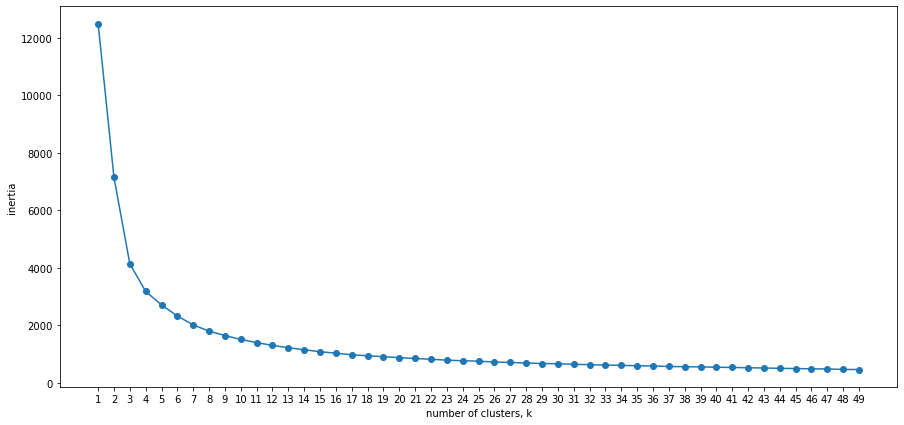

In [34]:
ks = range(1,50)
plt.figure(figsize=(15,7))
plt.plot(ks,inertia,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [47]:
#Silhouette analysis
from sklearn.metrics import silhouette_score
for num_clusters in range(2,6):
    kmeans =KMeans(n_clusters= num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    clusters_labels = kmeans.labels_
    
    #Silhouette score
    Silhouette_score = silhouette_score(rfm_df_scaled,clusters_labels)
    print('For n_clusters = {0},Silhouette score is {1}'.format(num_clusters,Silhouette_score))

For n_clusters = 2,Silhouette score is 0.48792106727132406
For n_clusters = 3,Silhouette score is 0.48369210150194675
For n_clusters = 4,Silhouette score is 0.45170723291013265
For n_clusters = 5,Silhouette score is 0.44298114631778096


In [48]:
rfm['Cluster_ID'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,4
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,3
4,12350.0,334.40,17,309,0


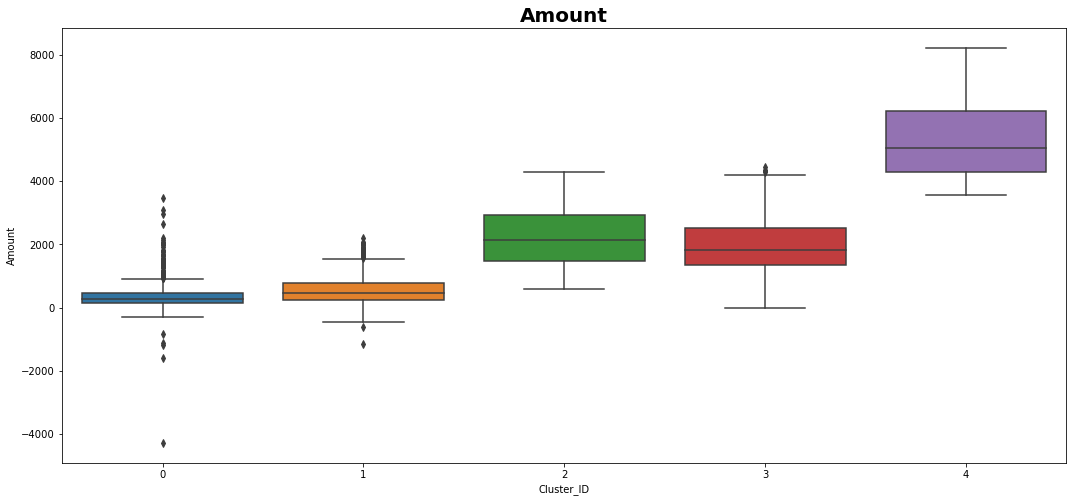

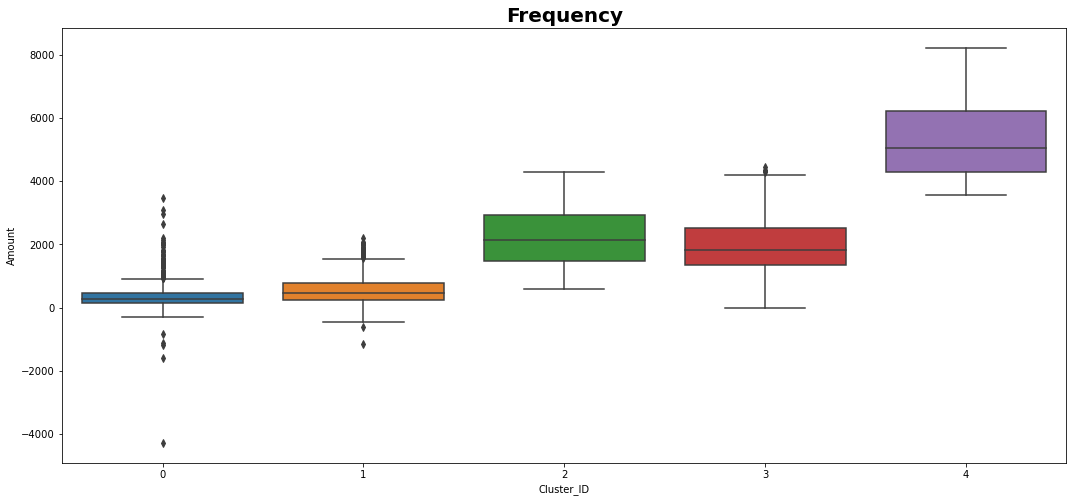

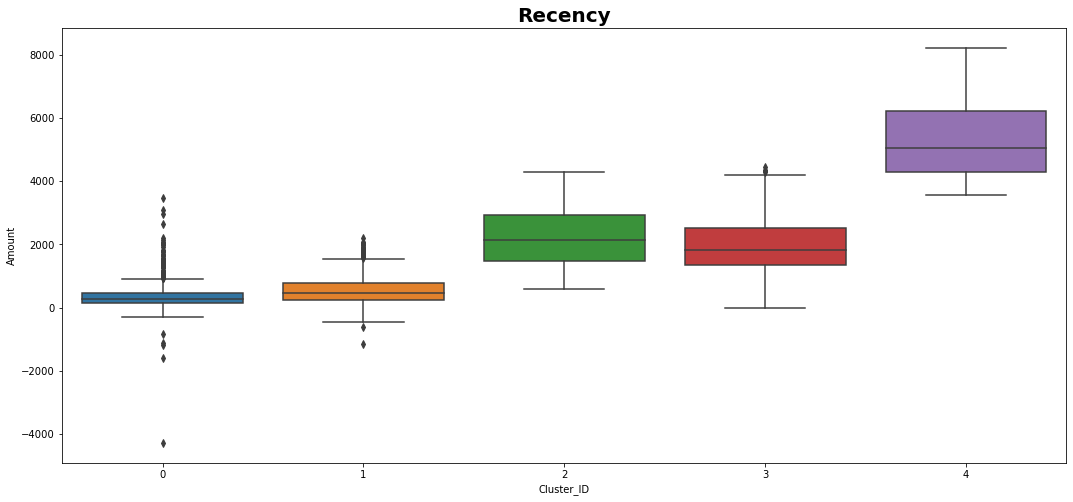

In [54]:
cols = ['Amount','Frequency','Recency']
for i in cols:
    plt.figure(figsize=(18,8))
    plt.title(i,fontsize=20,fontweight='bold')
    sns.boxplot(x='Cluster_ID',y='Amount',data=rfm)
    plt.show()

In [78]:
from sklearn.cluster import DBSCAN
sample_eps = [0.97, 0.14, 0.50, 0.52, 0.82]
for i in sample_eps:
    for j in range(1,6):
        dbscan = DBSCAN(eps=1,min_samples=j).fit(rfm_df_scaled)
        labels = dbscan.labels_
        count =len(set(labels))
        Silhouette_score = silhouette_score(rfm_df_scaled,labels)
        print('For eps = {0} and min_samples ={1} Silhouette score is {2} and count is {3}'.format(i,j,Silhouette_score,count))

For eps = 0.97 and min_samples =1 Silhouette score is 0.41631156535624975 and count is 5
For eps = 0.97 and min_samples =2 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.97 and min_samples =3 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.97 and min_samples =4 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.97 and min_samples =5 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.14 and min_samples =1 Silhouette score is 0.41631156535624975 and count is 5
For eps = 0.14 and min_samples =2 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.14 and min_samples =3 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.14 and min_samples =4 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.14 and min_samples =5 Silhouette score is 0.5715397402145614 and count is 2
For eps = 0.5 and min_samples =1 Silhouette score is 0.41631156535624975 and count is 5
For eps = 0.5 and min_samples 

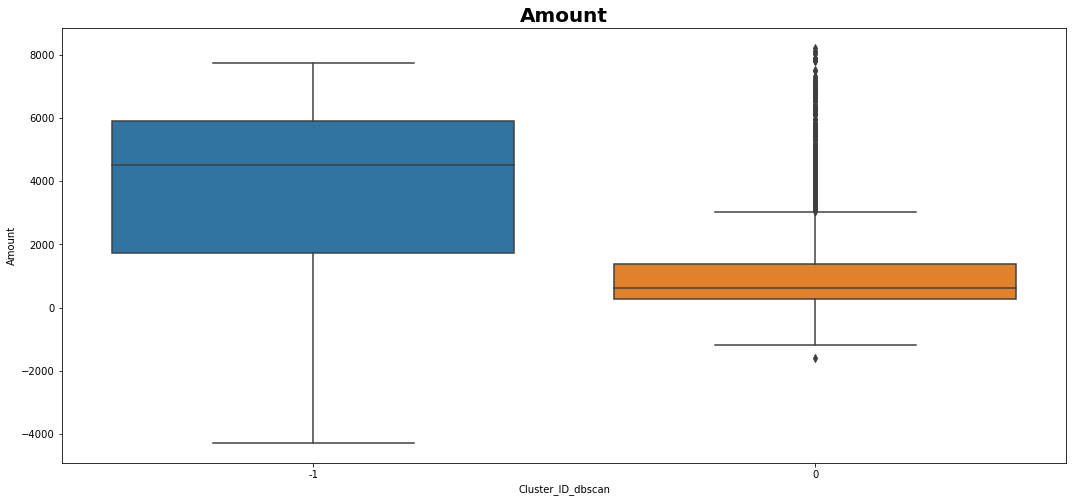

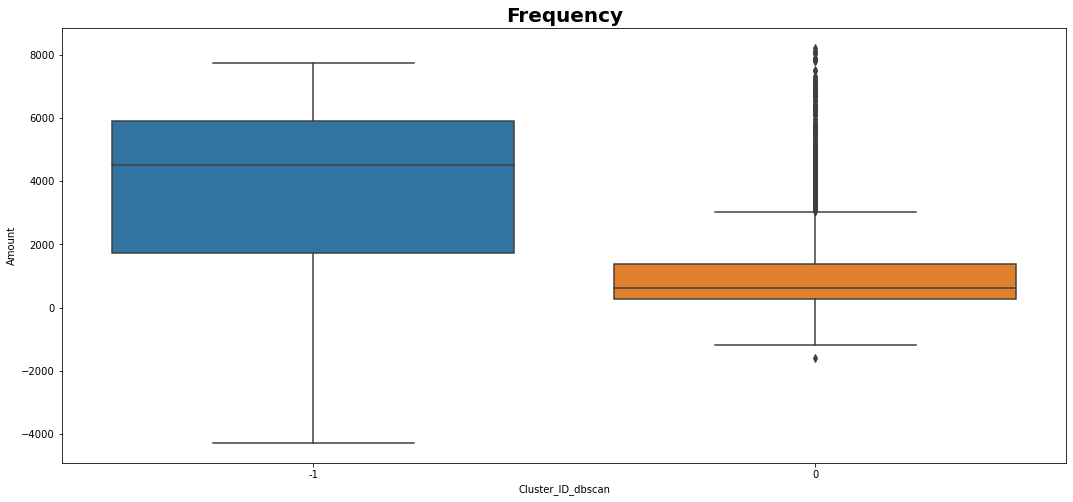

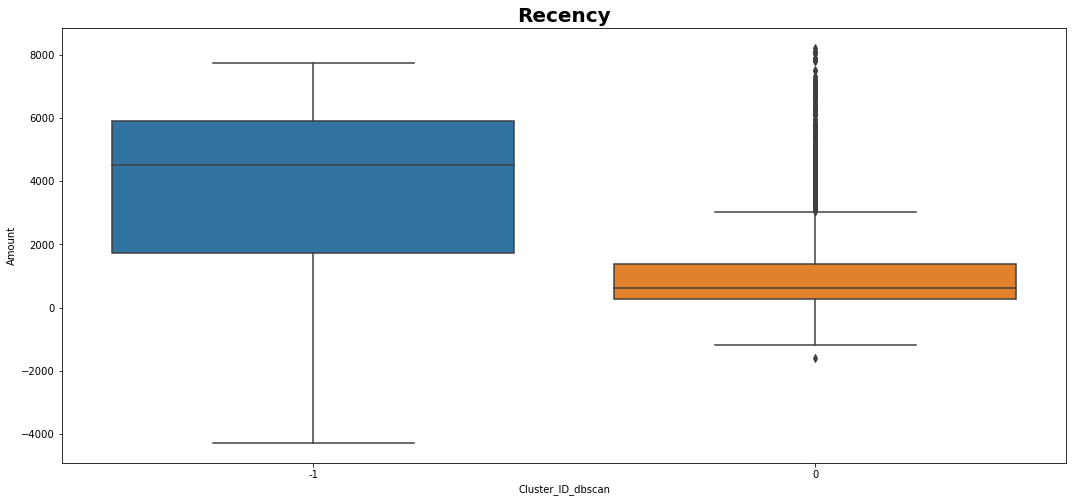

In [77]:
dbscan = DBSCAN(eps=0.87,min_samples=4).fit(rfm_df_scaled)
      
rfm['Cluster_ID_dbscan']=dbscan.labels_
rfm.head()

cols = ['Amount','Frequency','Recency']
for i in cols:
    plt.figure(figsize=(18,8))
    plt.title(i,fontsize=20,fontweight='bold')
    sns.boxplot(x='Cluster_ID_dbscan',y='Amount',data=rfm)
    plt.show()

In [79]:
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID,Cluster_ID_dbscan
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,4,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,3,0
4,12350.0,334.40,17,309,0,0
